In [1]:
import pandas as pd
import matplotlib.pyplot as plt


READING DATAFILE 


In [2]:
df=pd.read_csv("customer_churn_data.csv")
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


DATA-PREPROCESSING

In [3]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB
None
CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64


In [4]:
df.isna().sum().sum()

297

In [5]:
#FILLING NULL VALUES
df["InternetService"]=df["InternetService"].fillna("")
df["InternetService"]


0      Fiber Optic
1      Fiber Optic
2      Fiber Optic
3              DSL
4                 
          ...     
995    Fiber Optic
996               
997    Fiber Optic
998               
999               
Name: InternetService, Length: 1000, dtype: object

In [7]:
#CHECKING FOR DUPLICATES
df.duplicated().sum()
#we conclude that there are no duplicates

0

In [8]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [6]:
df.isna().sum()
#successfully filled the null values

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [9]:
#filter and select columns with numeric data types 
numeric_columns_data=df.select_dtypes(include=["number"])
numeric_columns_data

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
0,1,49,4,88.35,353.40
1,2,43,0,36.67,0.00
2,3,51,2,63.79,127.58
3,4,60,8,102.34,818.72
4,5,42,32,69.01,2208.32
...,...,...,...,...,...
995,996,42,41,37.14,1522.74
996,997,62,9,80.93,728.37
997,998,51,15,111.72,1675.80
998,999,39,68,65.67,4465.56


In [10]:
#checking correlation
numeric_columns_data.corr()
#-1 = negative corrlation- inverse relationship(example - as tenure increases monthly charges decreases) 
#1 = positive correlation- direct relationship(as tenure increases total charges paid overtime increases)

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


Churn
Yes    883
No     117
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x255b9c4b3b0>,
 [Text(-1.0265251160300626, 0.395279883322522, 'Yes'),
  Text(1.0265251345344482, -0.3952798352674129, 'No')],
 [Text(-0.5599227905618522, 0.215607209085012, '88.30%'),
  Text(0.5599228006551535, -0.21560718287313427, '11.70%')])

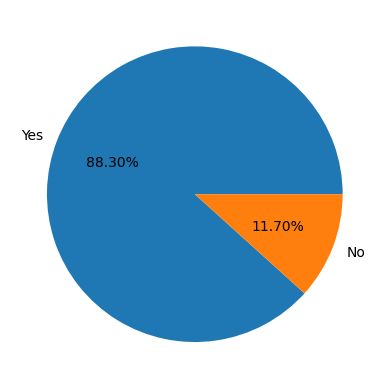

In [11]:
#value count of churn 
value_counts = df["Churn"].value_counts()
print(value_counts)
plt.pie(value_counts, labels=value_counts.index, autopct="%.2f%%")

In [12]:
#AVERAGE MONTHLY CHARGE GROUP BY CHURN
avg_monthly=df.groupby("Churn")["MonthlyCharges"].mean()
avg_monthly

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [13]:
#AVERAGE MONTHLY CHARGE GROUP BY CHURN and gender
avg_monthly_cg=df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()
avg_monthly_cg

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

<Axes: xlabel='ContractType'>

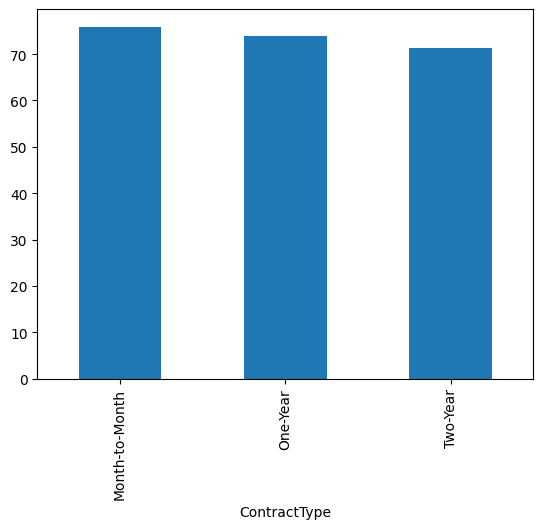

In [14]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
#we can conclude that the monthly charges are higher for month to month contract type


Text(0.5, 1.0, 'Monthly Charges')

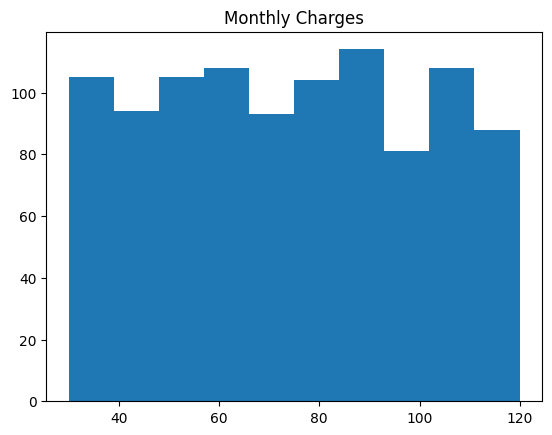

In [15]:
plt.hist(df["MonthlyCharges"])
plt.title("Monthly Charges")

Text(0.5, 1.0, 'Tenure')

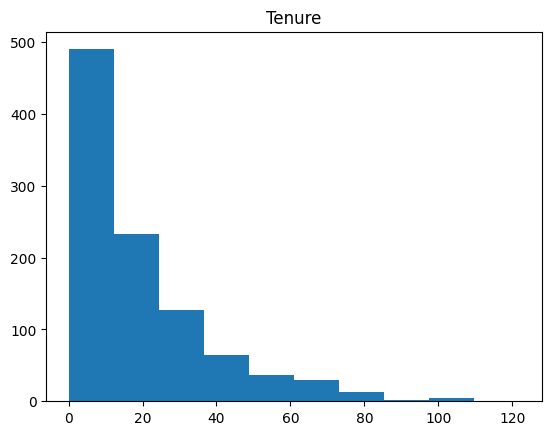

In [16]:
plt.hist(df["Tenure"])
plt.title("Tenure")

LOADING DATA AND SETTING PARAMETERS


In [17]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [18]:
y=df[["Churn"]]
X=df[["Age","Gender","Tenure","MonthlyCharges","TechSupport"]]
print(X.head())
y.head()
df["InternetService"].value_counts()

   Age  Gender  Tenure  MonthlyCharges TechSupport
0   49    Male       4           88.35         Yes
1   43    Male       0           36.67         Yes
2   51  Female       2           63.79          No
3   60  Female       8          102.34         Yes
4   42    Male      32           69.01          No


InternetService
Fiber Optic    395
DSL            308
               297
Name: count, dtype: int64

In [19]:
#changing the datatype of gender column to numeric
X["Gender"]=X["Gender"].apply(lambda x:1 if x=="Female" else 0)
X["TechSupport"]=X["TechSupport"].apply(lambda x:1 if x=="Yes" else 0)


C:\Users\prern\AppData\Local\Temp\ipykernel_5124\899130982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"]=X["Gender"].apply(lambda x:1 if x=="Female" else 0)
C:\Users\prern\AppData\Local\Temp\ipykernel_5124\899130982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["TechSupport"]=X["TechSupport"].apply(lambda x:1 if x=="Yes" else 0)


In [20]:
X.head()


,Age,Gender,Tenure,MonthlyCharges,TechSupport
0,49,0,4,88.35,1
1,43,0,0,36.67,1
2,51,1,2,63.79,0
3,60,1,8,102.34,1
4,42,0,32,69.01,0


In [21]:
y["Churn"]=y["Churn"].apply(lambda x:1 if x=="Yes" else 0)  
y["Churn"]


C:\Users\prern\AppData\Local\Temp\ipykernel_5124\3221987260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Churn"]=y["Churn"].apply(lambda x:1 if x=="Yes" else 0)


0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Churn, Length: 1000, dtype: int64

In [22]:
y.head()

,Churn
0,1
1,1
2,1
3,1
4,1


CREATING MACHINE LEARNING MODELS AND TRAINING DATA


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
#80 percent train , 20 percent test

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [25]:
X_train=scaler.fit_transform(X_train)

In [26]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [27]:
X_test=scaler.fit_transform(X_test)

In [28]:
X_train

array([[-0.26962814, -1.05925253,  1.22396288, -1.41860736,  0.97774752],
       [ 0.34113877,  0.94406194,  0.35595219, -1.0445771 , -1.02275892],
       [-0.98218954,  0.94406194,  1.00696021, -1.40023125, -1.02275892],
       ...,
       [-1.59295646,  0.94406194, -0.56630916,  1.0774799 ,  0.97774752],
       [-0.06603917,  0.94406194, -0.34930649,  1.19309621, -1.02275892],
       [-0.88039506, -1.05925253,  0.84420821, -0.4228523 ,  0.97774752]])

In [29]:
X_test

array([[-0.18360111, -1.16316   , -0.73900308, -0.70751114,  1.03046381],
       [-0.59735009,  0.85972695, -0.59227844,  0.55615914, -0.97043679],
       [ 0.54045961,  0.85972695, -0.88572771,  1.37004139, -0.97043679],
       [-0.80422458,  0.85972695, -0.73900308, -0.23974831, -0.97043679],
       [-0.59735009, -1.16316   ,  0.87496791, -0.30955742,  1.03046381],
       [-0.28703836,  0.85972695,  0.77715148, -0.22260954,  1.03046381],
       [-1.11453632, -1.16316   ,  0.19025294, -0.61889119,  1.03046381],
       [-1.73515979,  0.85972695, -0.05428811,  1.14263926, -0.97043679],
       [-1.73515979,  0.85972695,  0.19025294, -1.09543242,  1.03046381],
       [-1.73515979,  0.85972695, -0.0053799 , -1.20662537,  1.03046381],
       [ 0.95420859,  0.85972695, -0.98354414,  0.11431346, -0.97043679],
       [ 0.12671063,  0.85972695, -0.24992096,  1.30942869, -0.97043679],
       [ 0.54045961, -1.16316   ,  0.33697758,  0.6472872 ,  1.03046381],
       [ 1.47139482, -1.16316   , -0.9

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

def Accuracy(prediction):
    print("Accuracy score : ",accuracy_score(y_test,prediction)*100,"%")
def Precision(prediction):
    print("Precision score : ",precision_score(y_test,prediction)*100,"%")
def Recall(prediction):
    print("Recall score : ",recall_score(y_test,prediction)*100,"%")
def F1_Score(prediction):
    print("F1 Score : ",f1_score(y_test,prediction)*100,"%")
def Confusion_matrix(prediction):
    print("Confusion Matrix : ",confusion_matrix(y_test,prediction))

LOGISTIC REGRESSION MODEL


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [32]:
log_model=LogisticRegression() 
log_model.fit(X_train,y_train)

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [33]:
y_lr=log_model.predict(X_test)


In [34]:
#log_model.predict([[40,0,20,50,0]])[0]
Accuracy(y_lr)
Precision(y_lr)
Recall(y_lr)
F1_Score(y_lr)
Confusion_matrix(y_lr)


Accuracy score :  90.5 %
Precision score :  92.06349206349206 %
Recall score :  97.75280898876404 %
F1 Score :  94.82288828337875 %
Confusion Matrix :  [[  7  15]
 [  4 174]]


K-NEIGHBOUR CLASSIFIER MODEL


In [35]:
from sklearn.neighbors import KNeighborsClassifier


In [36]:
param_grid={"n_neighbors":[3,5,7,9],
            "weights":["uniform","distance"]
}

In [37]:
gridkn=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

In [38]:
gridkn.fit(X_train,y_train)

c:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [39]:
pd.DataFrame(gridkn.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004873,0.006204,0.005298,0.004773,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.85625,0.88750,0.86875,0.85000,0.88125,0.86875,0.014252,7
1,0.000000,0.000000,0.002509,0.003269,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.86875,0.88125,0.88125,0.84375,0.90000,0.87500,0.018540,2
2,0.004475,0.003667,0.006669,0.004106,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.84375,0.87500,0.85625,0.86250,0.88750,0.86500,0.015104,8
3,0.000169,0.000337,0.004140,0.005747,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.86250,0.88125,0.86250,0.86875,0.88125,0.87125,0.008478,4
4,0.000000,0.000000,0.005141,0.004240,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.84375,0.88125,0.88125,0.86875,0.88125,0.87125,0.014577,4
5,0.000419,0.000838,0.002908,0.005816,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.85625,0.88750,0.86875,0.86875,0.88750,0.87375,0.012119,3
6,0.000000,0.000000,0.007678,0.008339,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.86875,0.88125,0.88750,0.87500,0.88125,0.87875,0.006374,1
7,0.003125,0.006250,0.000000,0.000000,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.85000,0.88750,0.86875,0.88125,0.86875,0.87125,0.012870,4


In [40]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [41]:
y_kn=gridkn.predict(X_test)
y_kn

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [42]:
Accuracy(y_kn)
Precision(y_kn)
Recall(y_kn)
F1_Score(y_kn)
Confusion_matrix(y_kn)

Accuracy score :  86.5 %
Precision score :  90.81081081081082 %
Recall score :  94.3820224719101 %
F1 Score :  92.56198347107438 %
Confusion Matrix :  [[  5  17]
 [ 10 168]]


SUPPORT VECTOR CLASSIFIER MODEL


In [43]:
from sklearn.svm import SVC


In [44]:
svm=SVC()


In [45]:
param_grid={"C":[0.1,1,10,100],
            "kernel":["linear","poly","rbf"]
}

In [46]:
gridsvc=GridSearchCV(svm,param_grid,cv=5)

In [47]:
gridsvc.fit(X_train,y_train)

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']})

In [48]:
pd.DataFrame(gridsvc.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003364,0.002557,0.003780,0.003114,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.88125,0.88125,0.88125,0.88125,0.88125,0.88125,0.000000,3
1,0.004071,0.005263,0.003105,0.003806,0.1,poly,"{'C': 0.1, 'kernel': 'poly'}",0.88750,0.87500,0.88750,0.87500,0.88125,0.88125,0.005590,3
2,0.003175,0.004677,0.001600,0.003199,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.88125,0.88125,0.88125,0.88125,0.88125,0.88125,0.000000,3
3,0.001062,0.002124,0.005228,0.006605,1.0,linear,"{'C': 1, 'kernel': 'linear'}",0.88125,0.88125,0.88125,0.88125,0.88125,0.88125,0.000000,3
4,0.001915,0.003831,0.004415,0.006139,1.0,poly,"{'C': 1, 'kernel': 'poly'}",0.88125,0.88125,0.86875,0.86250,0.88125,0.87500,0.007906,11
5,0.003225,0.004397,0.003148,0.006296,1.0,rbf,"{'C': 1, 'kernel': 'rbf'}",0.86250,0.86875,0.88750,0.88125,0.88125,0.87625,0.009186,10
6,0.005309,0.006657,0.002926,0.005852,10.0,linear,"{'C': 10, 'kernel': 'linear'}",0.88125,0.88125,0.88125,0.88125,0.88125,0.88125,0.000000,3
7,0.010038,0.003342,0.001569,0.002072,10.0,poly,"{'C': 10, 'kernel': 'poly'}",0.86250,0.89375,0.88750,0.88125,0.88750,0.88250,0.010753,1
8,0.003160,0.004525,0.001602,0.003203,10.0,rbf,"{'C': 10, 'kernel': 'rbf'}",0.87500,0.89375,0.90000,0.83750,0.89375,0.88000,0.022845,9
9,0.020193,0.006404,0.000520,0.000689,100.0,linear,"{'C': 100, 'kernel': 'linear'}",0.88125,0.88125,0.88125,0.88125,0.88125,0.88125,0.000000,3


In [49]:
gridsvc.best_params_

{'C': 10, 'kernel': 'poly'}

In [50]:
y_svc=gridsvc.predict(X_test)
y_svc

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [51]:
Accuracy(y_svc)
Precision(y_svc)
Recall(y_svc)
F1_Score(y_svc)
Confusion_matrix(y_svc)


Accuracy score :  91.5 %
Precision score :  93.04812834224599 %
Recall score :  97.75280898876404 %
F1 Score :  95.34246575342465 %
Confusion Matrix :  [[  9  13]
 [  4 174]]


DECISION TREE CLASSIFIER MODEL

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt=DecisionTreeClassifier()

In [54]:
param_grid={"criterion":["gini","entropy"],
            "splitter":["best","random"],
            "max_depth":[None,10,20,30],
            "min_samples_split":[2,5,10],
            "min_samples_leaf":[1,2,4]
}



In [55]:
griddt=GridSearchCV(dt,param_grid,cv=5)

In [56]:
griddt.fit(X_train,y_train)

c:\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [57]:
pd.DataFrame(griddt.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004551,0.003488,0.002839,0.002000,gini,None,1,2,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.88125,0.88125,0.88750,0.87500,0.91250,0.88750,0.013110,39
1,0.006686,0.009284,0.000000,0.000000,gini,None,1,2,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.88125,0.92500,0.91875,0.87500,0.91875,0.90375,0.021139,3
2,0.000000,0.000000,0.003002,0.006004,gini,None,1,5,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.88125,0.89375,0.88750,0.85000,0.90000,0.88250,0.017410,79
3,0.000000,0.000000,0.003845,0.006057,gini,None,1,5,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.85000,0.87500,0.86875,0.88125,0.89375,0.87375,0.014470,124
4,0.002913,0.004875,0.000000,0.000000,gini,None,1,10,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.87500,0.87500,0.91250,0.85625,0.90000,0.88375,0.020000,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.001307,0.001793,0.001301,0.002603,entropy,30,4,2,random,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.88125,0.86875,0.90625,0.85000,0.90000,0.88125,0.020540,83
140,0.000209,0.000418,0.002789,0.003478,entropy,30,4,5,best,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.88125,0.86875,0.85625,0.86250,0.91875,0.87750,0.022220,101
141,0.000000,0.000000,0.001600,0.003200,entropy,30,4,5,random,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.88125,0.88125,0.88125,0.86250,0.89375,0.88000,0.010000,92
142,0.002863,0.003547,0.000000,0.000000,entropy,30,4,10,best,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.87500,0.87500,0.85625,0.85625,0.90625,0.87375,0.018286,124


In [58]:
griddt.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'random'}

In [59]:
y_dt=griddt.predict(X_test)

In [60]:
Accuracy(y_dt)
Precision(y_dt)
Recall(y_dt)
F1_Score(y_dt)
Confusion_matrix(y_dt)

Accuracy score :  89.0 %
Precision score :  93.33333333333333 %
Recall score :  94.3820224719101 %
F1 Score :  93.85474860335195 %
Confusion Matrix :  [[ 10  12]
 [ 10 168]]


RANDOM FOREST CLASSIFIER MODEL

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [62]:
param_grid={"n_estimators":[32,64,128,256],
            "max_features":[2,3,4],
            "bootstrap":[True,False]
}

In [63]:
gridrfc=GridSearchCV(rfc,param_grid,cv=5)

In [64]:
gridrfc.fit(X_train,y_train)

c:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


c:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(esti

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [65]:
pd.DataFrame(gridrfc.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027471,0.007202,0.002619,0.004499,True,2,32,"{'bootstrap': True, 'max_features': 2, 'n_esti...",0.88750,0.88750,0.91250,0.87500,0.90625,0.89375,0.013693,1
1,0.052121,0.006265,0.000000,0.000000,True,2,64,"{'bootstrap': True, 'max_features': 2, 'n_esti...",0.90000,0.90000,0.89375,0.84375,0.89375,0.88625,0.021433,5
2,0.105478,0.008335,0.006742,0.004143,True,2,128,"{'bootstrap': True, 'max_features': 2, 'n_esti...",0.88750,0.87500,0.88125,0.83125,0.88750,0.87250,0.021139,24
3,0.241384,0.024700,0.012944,0.005044,True,2,256,"{'bootstrap': True, 'max_features': 2, 'n_esti...",0.88125,0.88750,0.90000,0.84375,0.89375,0.88125,0.019764,13
4,0.034837,0.009041,0.001641,0.002388,True,3,32,"{'bootstrap': True, 'max_features': 3, 'n_esti...",0.90000,0.89375,0.90000,0.86250,0.90625,0.89250,0.015512,2
5,0.066545,0.005364,0.003909,0.005347,True,3,64,"{'bootstrap': True, 'max_features': 3, 'n_esti...",0.90000,0.86875,0.88750,0.85000,0.91875,0.88500,0.023914,9
6,0.147308,0.022236,0.002504,0.003380,True,3,128,"{'bootstrap': True, 'max_features': 3, 'n_esti...",0.89375,0.88750,0.89375,0.83750,0.90625,0.88375,0.023914,10
7,0.225029,0.016628,0.007608,0.005305,True,3,256,"{'bootstrap': True, 'max_features': 3, 'n_esti...",0.89375,0.90000,0.89375,0.85000,0.90625,0.88875,0.019922,4
8,0.029288,0.003430,0.000000,0.000000,True,4,32,"{'bootstrap': True, 'max_features': 4, 'n_esti...",0.89375,0.88750,0.90000,0.85000,0.90000,0.88625,0.018708,5
9,0.071999,0.008163,0.003939,0.004620,True,4,64,"{'bootstrap': True, 'max_features': 4, 'n_esti...",0.89375,0.87500,0.90000,0.84375,0.91875,0.88625,0.025434,5


In [66]:
gridrfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 32}

In [67]:
y_rfc=gridrfc.predict(X_test)
y_rfc

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [68]:
Accuracy(y_rfc)
Precision(y_rfc)
Recall(y_rfc)
F1_Score(y_rfc)
Confusion_matrix(y_rfc)

Accuracy score :  89.5 %
Precision score :  94.35028248587571 %
Recall score :  93.82022471910112 %
F1 Score :  94.08450704225352 %
Confusion Matrix :  [[ 12  10]
 [ 11 167]]


RECALL SCORE AS FINAL MODEL EVALUATER 

In [69]:
best_model=gridrfc.best_estimator_
#random forest classifier has the highest recall score 

In [70]:
joblib.dump(best_model,"best_model.pkl")

['best_model.pkl']